In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [10]:
# create state
class BatsmanState(TypedDict):
    runs: int
    balls: int
    runs_4: int
    runs_6: int
    strike_rate: float
    boundary_percentage: float
    balls_per_boundary: float
    summary: str

In [24]:
# create nodes
def calculate_strike_rate(state: BatsmanState):
    runs = state["runs"]
    balls = state["balls"]

    strike_rate = (runs/balls)*100

    return {"strike_rate": strike_rate}

def  calculate_boundry_percentage(state: BatsmanState):
    total_runs = state["runs"]
    runs_4 = state["runs_4"]
    runs_6 = state["runs_6"]

    runs_4_count = runs_4 * 4
    runs_6_count = runs_6 * 6

    boundary_percentage = ((runs_6_count + runs_4_count)/total_runs) * 100

    return {"boundary_percentage": boundary_percentage}

def calculate_balls_per_boundary(state: BatsmanState):
    total_runs = state["runs"]
    runs_4 = state["runs_4"]
    runs_6 = state["runs_6"]

    balls_per_boundary = total_runs/(runs_4 + runs_6)

    return {"balls_per_boundary": balls_per_boundary}

def calculate_summary(state: BatsmanState):
    summary = f"""
    Strike Rate: {state["strike_rate"]}
    Balls Per Boundary: {state["balls_per_boundary"]}
    Boundary Percentage: {state["boundary_percentage"]}
"""
    
    return {"summary": summary}

In [25]:
# create graph
graph = StateGraph(BatsmanState)

In [26]:
# define nodes
graph.add_node("calculate_bpb", calculate_balls_per_boundary)
graph.add_node("calculate_sr", calculate_strike_rate)
graph.add_node("calculate_bp", calculate_boundry_percentage)
graph.add_node("calculate_summary", calculate_summary)

In [27]:
# define edges
graph.add_edge(START, "calculate_bpb")
graph.add_edge(START, "calculate_sr")
graph.add_edge(START, "calculate_bp")

graph.add_edge("calculate_bpb", "calculate_summary")
graph.add_edge("calculate_sr", "calculate_summary")
graph.add_edge("calculate_bp", "calculate_summary")

graph.add_edge("calculate_summary", END)

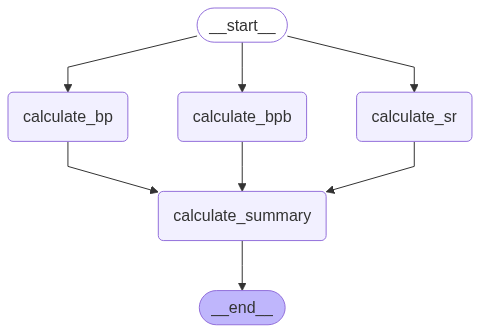

In [28]:
# compile graph and get workflow
workflow = graph.compile()
workflow

In [29]:
# execute graph
initial_state = {"runs": 100, "runs_4": 6, "runs_6": 4, "balls": 50}
output_state = workflow.invoke(initial_state)
output_state

{'runs': 100,
 'balls': 50,
 'runs_4': 6,
 'runs_6': 4,
 'strike_rate': 200.0,
 'boundary_percentage': 48.0,
 'balls_per_boundary': 10.0,
 'summary': '\n    Strike Rate: 200.0\n    Balls Per Boundary: 10.0\n    Boundary Percentage: 48.0\n'}

In [30]:
print(output_state["summary"])


    Strike Rate: 200.0
    Balls Per Boundary: 10.0
    Boundary Percentage: 48.0

